<a href="https://colab.research.google.com/github/nishee0521/Deep-Learning/blob/master/Self_Organizing_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls

gdrive	sample_data


In [0]:
%cd gdrive

/content/gdrive


In [0]:
!ls

Self_Organizing_Maps


In [0]:
%cd gdrive/My Drive/DeepLearning/Deep_Learning_A_Z/Volume 2 - Unsupervised Deep Learning/Part 4 - Self Organizing Maps (SOM)/Section 16 - Building a SOM/P16-Self-Organizing-Maps.zip (Unzipped Files)/Self_Organizing_Maps

/content/gdrive/My Drive/DeepLearning/Deep_Learning_A_Z/Volume 2 - Unsupervised Deep Learning/Part 4 - Self Organizing Maps (SOM)/Section 16 - Building a SOM/P16-Self-Organizing-Maps.zip (Unzipped Files)/Self_Organizing_Maps


In [0]:
import pandas as pd
import numpy as np


In [0]:
df=pd.read_csv('Credit_Card_Applications.csv')

In [0]:
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [0]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [0]:
#Feature Scaling 

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
sc=MinMaxScaler(feature_range=(0,1))

X=sc.fit_transform(X)

In [0]:
#Training using minisom
from minisom import MiniSom
som=MiniSom(x=10,y=10, input_len=15,sigma=1.0, learning_rate=0.5)

In [0]:
!pip3 install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.4-cp36-none-any.whl size=8467 sha256=a416499815c6d847aad3247e6ecf9e612eab6db62ea69db288755c6e7fd963d5
  Stored in directory: /root/.cache/pip/wheels/85/84/20/28f3352b30a546473c7a4c78796eff9fdafa729a900f06d27d
Successfully built MiniSom


In [0]:
#Training the Model
from minisom import MiniSom

In [0]:
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)

In [0]:

som.random_weights_init(X)

In [0]:
som.train_random(X,num_iteration=100)

In [0]:
from pylab import bone, pcolor, colorbar,plot,show

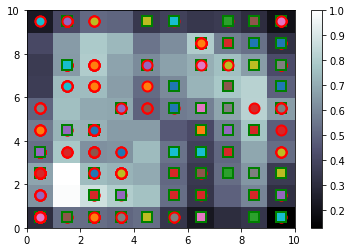

In [0]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
colors=['r','g']
for i,x in enumerate(X):
  w=som.winner(x)
  plot(w[0]+0.5,w[1]+0.5,markers[Y[i]],markeredgecolor=colors[Y[i]],markerfacecolor=None, markersize=10,markeredgewidth=2)




In [0]:
show()

In [0]:
mappings = som.win_map(X)
print(mappings)

defaultdict(<class 'list'>, {(2, 4): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
       0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([3.60166420e-01, 1.00000000e+00, 1.32781955e-01, 5.35714286e-02,
       0.00000000e+00, 3.84615385e-01, 3.75000000e-01, 1.89473684e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       5.00000000e-01, 6.00000000e-02, 6.70000000e-04]), array([4.64667700e-01, 1.00000000e+00, 7.89473684e-02, 6.25000000e-02,
       0.00000000e+00, 5.38461538e-01, 3.75000000e-01, 8.19298246e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       5.00000000e-01, 5.60000000e-02, 6.00000000e-05]), array([0.81120334, 1.        , 0.17789474, 0.01196429, 0.5       ,
       0.23076923, 0.875     , 0.12280702, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.17      , 0.        ]), array([0.8735269

In [0]:
frauds = np.concatenate((mappings[(1,1)], mappings[(1,2)]), axis=0)
# frauds = sc.inverse_transform(frauds)
print(frauds)

[]


In [0]:
frauds = mappings[(1,2)]
print(frauds)

[]


In [0]:
print(frauds)

[]


In [0]:
frauds = mappings[(1,2)]
print(frauds)

[]


In [0]:
frauds = np.concatenate((mappings[(8,5)], mappings[(6,8)]), axis=0)
frauds = sc.inverse_transform(frauds)
frauds = frauds.astype('int')
print(frauds)

[[15682540        1       62       12        1        8        8        5
         1        0        0        0        2      112        1]
 [15608595        0       30        1        2        9        8        0
         0        1        3        0        2        0       34]
 [15719940        0       35        3        2        1        1        0
         0        1        6        0        2        0      201]
 [15801473        0       20        0        1        9        2        1
         0        0        0        0        2      260        1]
 [15761158        0       16        1        2       11        4        0
         0        1        1        0        2      108       98]
 [15711742        0       23        1        2        5        3        0
         0        1        1        0        2      200       53]
 [15761733        0       16        0        2        1        1        0
         0        1        1        0        2      160      127]
 [15770995        0 

#**_Hybrid Deep Learning Model_**

We work on the credit card dataset and build an unsupervised model
Then we convert it to a hybrid model by adding ANN

In [0]:
customer= df.iloc[:,1:]
customer = customer.values
customer = customer.reshape([690, 15])
# customer = customer.T
# y=np.zeros([690,1])
# chk=list(frauds[:,0])
# i=0
# j=0

# for i in range(690):
#   if df.iloc[i, 0:1].values in chk:
#     y[i]=1


In [0]:
print(chk)

[15682540 15608595 15719940 15801473 15761158 15711742 15761733 15770995
 15666166 15605872 15736399 15766734 15667934 15665087]


In [0]:
print(frauds.shape)

(14, 15)


In [0]:
print(y)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [0]:
from keras.models import Sequential
from keras.layers import Dense


In [0]:
classifier= Sequential()


In [0]:
classifier.add(Dense(input_dim=15,units=100, kernel_initializer='uniform',activation='relu'))


In [0]:
classifier.add(Dense(units=100,kernel_initializer='uniform',activation='relu'))
# classifier.add(Dense(units=10,kernel_initializer='uniform',activation='relu'))
# classifier.add(Dense(units=5,kernel_initializer='uniform',activation='relu'))

classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))


In [0]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
classifier.fit(x=customer,y=y, batch_size=32, epochs=50)

Epoch 1/50
690/690 [==============================] - 0s 232us/step - loss: 0.6837 - accuracy: 0.9493
Epoch 2/50
690/690 [==============================] - 0s 46us/step - loss: 0.6491 - accuracy: 0.9797
Epoch 3/50
690/690 [==============================] - 0s 56us/step - loss: 0.5745 - accuracy: 0.9797
Epoch 4/50
690/690 [==============================] - 0s 43us/step - loss: 0.4655 - accuracy: 0.9797
Epoch 5/50
690/690 [==============================] - 0s 43us/step - loss: 0.3536 - accuracy: 0.9797
Epoch 6/50
690/690 [==============================] - 0s 49us/step - loss: 0.2460 - accuracy: 0.9797
Epoch 7/50
690/690 [==============================] - 0s 53us/step - loss: 0.1571 - accuracy: 0.9797
Epoch 8/50
690/690 [==============================] - 0s 57us/step - loss: 0.1189 - accuracy: 0.9797
Epoch 9/50
690/690 [==============================] - 0s 43us/step - loss: 0.1054 - accuracy: 0.9797
Epoch 10/50
690/690 [==============================] - 0s 51us/step - loss: 0.0969 - accur

In [0]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1),)
customer=sc.fit_transform(customer)